# Index-Guided Modes in a Ridge Waveguide

In [17]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video

In [26]:
resolution = 10 # pixels/μm

cell_size = mp.Vector3(14,14)

pml_layers = [mp.PML(thickness=2)]

# rotation angle (in degrees) of waveguide, counter clockwise (CCW) around z-axis
rot_angle = np.radians(20)

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(mp.inf,1,mp.inf),
                     e1=mp.Vector3(1).rotate(mp.Vector3(z=1), rot_angle),
                     e2=mp.Vector3(y=1).rotate(mp.Vector3(z=1), rot_angle),
                     material=mp.Medium(epsilon=12))]

fsrc = 0.15 # frequency of eigenmode or constant-amplitude source
kx = 0.4    # initial guess for wavevector in x-direction of eigenmode
bnum = 1    # band number of eigenmode

sources = [mp.Source(src=mp.GaussianSource(fsrc,fwidth=0.2*fsrc) if compute_flux else mp.ContinuousSource(fsrc),
                         center=mp.Vector3(),
                         size=mp.Vector3(y=2),
                         component=mp.Ez)]

sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    geometry=geometry,
                    symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [])

tran = sim.add_flux(fsrc, 0, 1, mp.FluxRegion(center=mp.Vector3(x=5), size=mp.Vector3(y=14)))

-----------
Initializing structure...
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (0.939693,0.34202,0), (-0.34202,0.939693,0), (0,0,1)


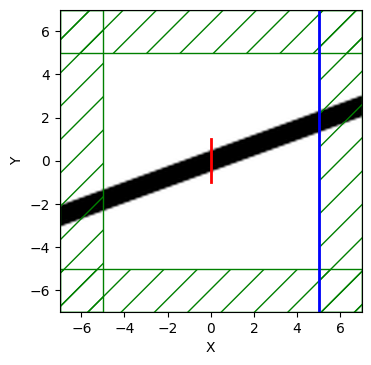

In [27]:
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

In [32]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(sim,mp.Ez,f=f,normalize=True)
sim.run(mp.at_every(1,animate),until=50)
plt.close()

Normalizing field data...
run 1 finished at t = 100.0 (2000 timesteps)


In [35]:
filename = 'media/oblique-source-normal.mp4'
animate.to_mp4(10,filename)
Video(filename)

Generating MP4...


In [36]:
sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=0.2*fsrc) if compute_flux else mp.ContinuousSource(fsrc),
                                  center=mp.Vector3(),
                                  size=mp.Vector3(y=14),
                                  direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
                                  eig_kpoint=mp.Vector3(kx).rotate(mp.Vector3(z=1), rot_angle),
                                  eig_band=bnum,
                                  eig_parity=mp.EVEN_Y+mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
                                  eig_match_freq=True)]

sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    geometry=geometry,
                    symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [])

tran = sim.add_flux(fsrc, 0, 1, mp.FluxRegion(center=mp.Vector3(x=5), size=mp.Vector3(y=14)))

In [37]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(sim,mp.Ez,f=f,normalize=True)
sim.run(mp.at_every(1,animate),until=50)
plt.close()

-----------
Initializing structure...
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (0.939693,0.34202,0), (-0.34202,0.939693,0), (0,0,1)
Normalizing field data...
run 0 finished at t = 50.0 (1000 timesteps)


In [38]:
filename = 'media/oblique-source-eig.mp4'
animate.to_mp4(10,filename)
Video(filename)

Generating MP4...


-----------
Initializing structure...
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Meep progress: 181.57500000000002/200.0 = 90.8% done in 4.0s, 0.4s to go
run 0 finished at t = 200.0 (8000 timesteps)
flux for 0.0 radians:, 5242.304080


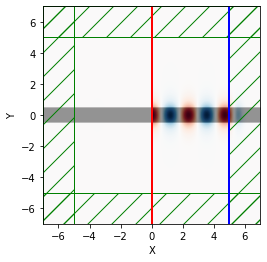

-----------
Initializing structure...
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (0.939693,0.34202,0), (-0.34202,0.939693,0), (0,0,1)
Meep progress: 96.0/200.0 = 48.0% done in 4.0s, 4.3s to go
Meep progress: 196.47500000000002/200.0 = 98.2% done in 8.0s, 0.1s to go
run 0 finished at t = 200.0 (8000 timesteps)
flux for 0.3490658503988659 radians:, 5201.919969


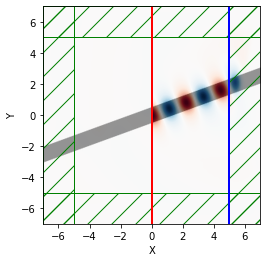

-----------
Initializing structure...
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (0.766044,0.642788,0), (-0.642788,0.766044,0), (0,0,1)
Meep progress: 81.075/200.0 = 40.5% done in 4.0s, 5.9s to go
Meep progress: 172.55/200.0 = 86.3% done in 8.0s, 1.3s to go
run 0 finished at t = 200.0 (8000 timesteps)
flux for 0.6981317007977318 radians:, 4948.168930


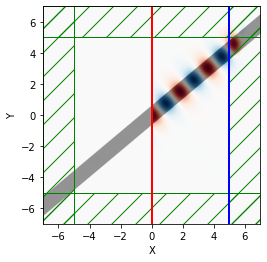

In [44]:

for rot_angle in np.radians([0, 20, 40]):
    
    resolution = 20

    geometry = [mp.Block(center=mp.Vector3(),
                         size=mp.Vector3(mp.inf,1,mp.inf),
                         e1=mp.Vector3(1).rotate(mp.Vector3(z=1), rot_angle),
                         e2=mp.Vector3(y=1).rotate(mp.Vector3(z=1), rot_angle),
                         material=mp.Medium(epsilon=12))]

    sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=0.4*fsrc) if compute_flux else mp.ContinuousSource(fsrc),
                                  center=mp.Vector3(),
                                  size=mp.Vector3(y=14),
                                  direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
                                  eig_kpoint=mp.Vector3(kx).rotate(mp.Vector3(z=1), rot_angle),
                                  eig_band=bnum,
                                  eig_parity=mp.EVEN_Y+mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
                                  eig_match_freq=True)]

    sim = mp.Simulation(cell_size=cell_size,
                        resolution=resolution,
                        boundary_layers=pml_layers,
                        sources=sources,
                        geometry=geometry,
                        symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [])


    tran = sim.add_flux(fsrc, 0, 1, mp.FluxRegion(center=mp.Vector3(x=5), size=mp.Vector3(y=14)))
    
    sim.run(until=200)
    print("flux for {} radians:, {:.6f}".format(rot_angle,mp.get_fluxes(tran)[0]))
    
    sim.plot2D(fields=mp.Ez)
    plt.show()